In [1]:
from scipy import interpolate
import gsw
from xmitgcm import open_mdsdataset
import numpy as np
import xarray as xr
import copy
from matplotlib import pyplot as plt
import matplotlib.colors
%matplotlib inline

In [2]:
plt.rcParams.update({'font.size': 14
    , 'legend.markerscale': 1., 'axes.titlesize': 16, 'axes.labelsize' : 16,
      'legend.fontsize' : 16,'legend.handlelength': 2})

plt.rc('xtick', labelsize=18) 
plt.rc('ytick', labelsize=18)

In [3]:
data_dir = '/WORK/sio_goc03/pv_flux/coarse_0918/den_jump2/'
ds1 = open_mdsdataset(data_dir, prefix={'T'}).chunk()

data_dir = '/WORK/sio_goc03/pv_flux/fine_0918/crun_0.3/'
ds2 = open_mdsdataset(data_dir, prefix={'T'}).chunk()

data_dir = '/WORK/sio_goc03/pv_flux/fine_0918/den_jump2/'
ds3 = open_mdsdataset(data_dir, prefix={'T'}).chunk()

data_dir = '/WORK/sio_goc03/pv_flux/fine_32/crun/'
ds4 = open_mdsdataset(data_dir, prefix={'T'}).chunk()

/WORK/sio_goc03/anaconda3/envs/eddypy/lib/python3.5/site-packages/xmitgcm/mds_store.py:217: FutureWarning: In xarray version 0.13 `auto_combine` will be deprecated.
  ds = xr.auto_combine(datasets)
/WORK/sio_goc03/anaconda3/envs/eddypy/lib/python3.5/site-packages/xmitgcm/mds_store.py:217: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset` to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in in future, please use the
new `combine_nested` function (or the `combine='nested'` option to
open_mfdataset).The datasets supplied require both concatenation and merging. From
xarray version 0.14 this will operation will require either using the
new `combine_nested` function (or the `combine='nested'` option to
open_mfdataset), with a nested list structure such that you can combine
along 

In [4]:
lon1 = ds1.XC
lat1 = ds1.YC

lon2 = ds2.XC
lat2 = ds2.YC

lon3 = ds3.XC
lat3 = ds3.YC

lon4 = ds4.XC
lat4 = ds4.YC

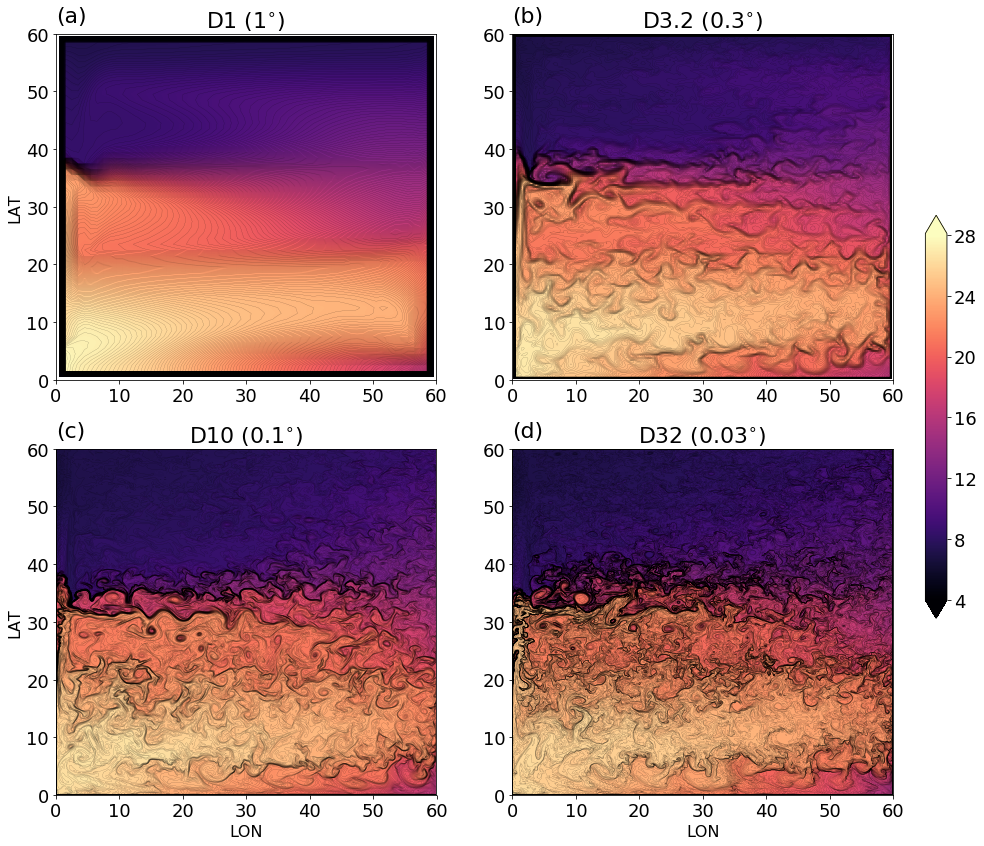

In [7]:
fig = plt.figure(figsize=(15, 14))

plt.subplot(221)
h1 = plt.contourf(lon1, lat1, ds1.T[-1, 0, :, :], np.arange(4, 28.1, 0.02), cmap='magma', vmax=28, vmin=4, extend='both')
plt.contour(lon1, lat1, ds1.T[-1, 0, :, :], np.arange(4, 28, 0.1), colors='k', linewidths=0.1)

#plt.xlabel('LON')
plt.ylabel('LAT')
plt.title(r'D1 (1$^{\circ}$)', size=22)
plt.text(0, 62, '(a)', size=22)
x_ticks = np.arange(0, 61, 10)
plt.xticks(x_ticks)
plt.yticks(x_ticks)

plt.subplot(222)
h1 = plt.contourf(lon2, lat2, ds2.T[-1, 0, :, :], np.arange(4, 28.1, 0.02), cmap='magma', vmax=28, vmin=4, extend='both')
plt.contour(lon2, lat2, ds2.T[-1, 0, :, :], np.arange(4, 28, 0.1), colors='k', linewidths=0.1)

#plt.xlabel('LON')
#plt.ylabel('LAT')
plt.title(r'D3.2 (0.3$^{\circ}$)', size=22)
plt.text(0, 62, '(b)', size=22)
plt.xticks(x_ticks)
plt.yticks(x_ticks)

plt.subplot(223)
h1 = plt.contourf(lon3, lat3, ds3.T[-1, 0, :, :], np.arange(4, 28.1, 0.02), cmap='magma', vmax=28, vmin=4, extend='both')
plt.contour(lon3, lat3, ds3.T[-1, 0, :, :], np.arange(4, 28, 0.1), colors='k', linewidths=0.1)

plt.xlabel('LON')
plt.ylabel('LAT')
plt.title(r'D10 (0.1$^{\circ}$)', size=22)
plt.text(0, 62, '(c)', size=22)

plt.subplot(224)
h1 = plt.contourf(lon4, lat4, ds4.T[-1, 0, :, :], np.arange(4, 28.1, 0.02), cmap='magma', vmax=28, vmin=4, extend='both')
plt.contour(lon4, lat4, ds4.T[-1, 0, :, :], np.arange(4, 28, 0.1), colors='k', linewidths=0.1)

plt.xlabel('LON')
#plt.ylabel('LAT')
plt.title(r'D32 (0.03$^{\circ}$)', size=22)
plt.text(0, 62, '(d)', size=22)

c_ticks = np.arange(4, 29, 4)
cbar_ax = fig.add_axes([0.93, 0.3, 0.02, 0.4])
hc = fig.colorbar(h1, cax=cbar_ax, ticks=c_ticks)

plt.savefig('./pics/Figure_02.png', dpi=300)